<a href="https://colab.research.google.com/github/Chetna1519/Car-Price-Prediciton-Assignment-6-/blob/main/Car_Price_Prediction_(Assignment_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explaining the Importance of Car Price Prediction in the Automotive Industry
 The Importance of Predicting Car Prices helps buyers and sellers to make informed decisions.

 It also helps Dealers and Manufacturers to optimize their pricing strategies and inventory management.

 Predictive analytics can help dealers to identify which cars are likely to sell quickly and which ones are not sell.

 Car Price Prediction help dealers to make better decisions about which cars to stock and how much to charge for them.

  It also help manufacturers to identify which features are most important to consumers and then they design cars which meets the needs of their customers.

In [1]:
## importing the libraries for predicting the car price
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Objective of the Car price prediction:
   Predict car prices accurately using machine learning algorithms.
   For using machine learning algorithms we importing the essential libraries like linear regression,metrics and logistic regression. we are going to train and test our data set for better result.


In [3]:
# loading the dataset
Car_dataset = pd.read_csv('/content/car data.csv')

## An Overview of the dataset:
  This dataset includes features of car, year of launch,fuel type of different cars and their price respectively.

  In this dataset we have to predict the price of cars with respect to the actual price.

In [4]:
## checking the first five rows of the data set
Car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
## checking the number of rows and columns present in data set
Car_dataset.shape

(301, 9)

Task 1.
## Discuss the steps invoved in cleaining and preprocessing the dataset, such as handling the missing values, categorical encoding and feature scaling.

In [6]:
## Let's get some information about the data set
Car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


So, there is no missing values present in the dataset.

In [7]:
## Checking the number of missing values
Car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

We see that their is no null values or missing values present in the data set.

## Data Processing

In [8]:
## Checking the distribution of categorical data
print(Car_dataset.Fuel_Type.value_counts())
print(Car_dataset.Seller_Type.value_counts())
print(Car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


**Categorical Encoding**

 finds the categorical variables. Like *Fuel_type, seller_type, and transmission*.

 We encode the categorical data by replacing the string values to integer.

## Encoding the Categorical Data

In [9]:
Car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace = True)
Car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace = True)
Car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace = True)

In [10]:
## Checking the encoding
Car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


 Task 2
 ## Explaing the process of selecting relevant features for the prediction task:
 *Feature selection is an important step in machine learning that involves selecting a subset of relevant features from the available set of features. The goal of feature selection is to improve model performance by reducing dimensionality, removing irrelevant or rebundant f*eatures and enhancing model interpretability.



*   Undestand the problem and domain
knowledge.



*   Perform exploratory data analysis.
*    Consider domain knowlwdge-driven feature selection.



*   Evaluate feature importance with
statistical methods.


*   Utilize regularization-based methods.




*   Apply feature selection algorithms.


*   Consider feature interaction and engineering.
*   Validate and iterate.




## Describe any Additional feature engineering techniques employes to improve the models performance.

In addition to feature selection, feature engineering techniques play a crucial role in improving a model's performance by creating new features or transforming existing ones to better represent the underlying patterns in the data.

**Logarithmic or Exponential Transformations**: Applying logarithmic or explonential transformation to features can help handle skewed distribution and make them more symmetrical. This can improve the model;s ability to capture patterns and relationsships in the data, especially when the target variables or some features exhibit exponential or multiplictive relationships.

## Splitting the data and Target the Variables


In [11]:
x = Car_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)

In [12]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [13]:
y = Car_dataset['Selling_Price']
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


## Splitting Train and Test Data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.1, random_state=2)

Task 3
## Introduce at least two machine learning algorithms used for car price prediction.

Linear Regression: It is a simple and powerful algorithm used for predicting continuous numeric values. The algorithm fits a linear equation to the data, considering the coffisients and intercept that minimize the sum of squared differences betwwen the predicted and actual prices. Linear regression assumes a linear relationship between the feature and the target variable, making it interpretable and suitable for understanding the impact of each feature on the predicted car price.

Random Forest: Random Forest is an ensemble learning algorithm that conmbines multiple decision tree to make predictions. In the case of car price prediction, Random Forest can captures complex nonlinear relationship between car features and their prices. It works by creating a multitude of decision tree using bootstrapped samples from the dataset and random features subsets. Random forest is robust against overfitting can handle a large number of features and provides feature importance rankings, which can be helpful in understanding the relative importance of diferent features in predicting car prices.




Lasso Regression: Lasso regression, short for "Least Absolute Shrinkage and Selection Operator", is a machine learning algorithm used for linear regression and feature selection. I tis a regularization technique that adds a penalty term to the ordinary least squares objective function, encoraging sparse solutions where some feature coefficients become exactly zero. This property makes Lasso Regression useful for both prediction and feature selection tasks.



## Model Training

1. Linear Regression

In [16]:
## Loading the linear regression model
lin_reg_model = LinearRegression()

In [17]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

## Model Evaluation

In [22]:
## Prediction on Training Data
training_data_prediction = lin_reg_model.predict(x_train)

In [24]:
## R squared Error
Error_score = metrics.r2_score(y_train, training_data_prediction)
print('R squared Error :', Error_score)

R squared Error : 0.8799451660493711


## Visualize the Actual Price and Predicted Price

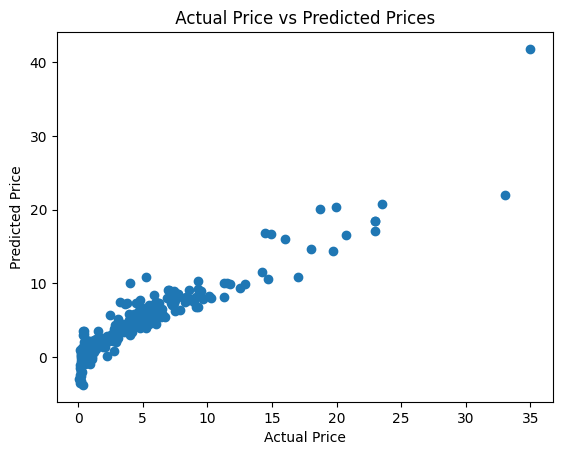

In [29]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Price vs Predicted Prices ")
plt.show()

In [30]:
## Prediction on test data
test_data_prediction = lin_reg_model.predict(x_test)

In [31]:
## R squared error
Error_score = metrics.r2_score(y_test, test_data_prediction)
print("R suared Error :", Error_score)

R suared Error : 0.8365766715027051


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

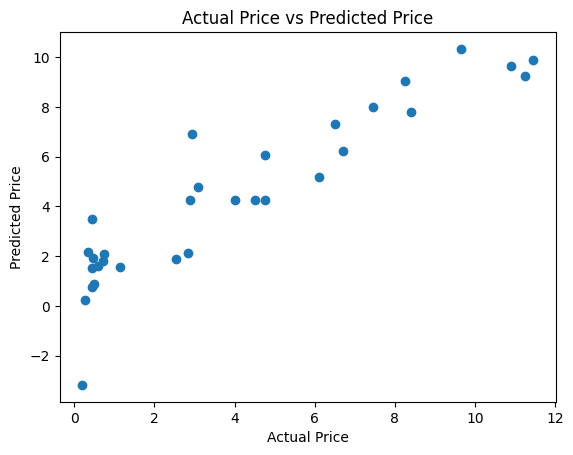

In [38]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

2.Lasso Regression

In [39]:
# Loading the linear regression model
lass_reg_model = Lasso()

In [40]:
lass_reg_model.fit(x_train, y_train)


Lasso()

## Model Evaluation

In [41]:
## Prediction on Training data
training_data_prediction = lass_reg_model.predict(x_train)

In [42]:
# R squared error
Error_score = metrics.r2_score(y_train, training_data_prediction)
print("r squared Error :", Error_score)

r squared Error : 0.8427856123435794


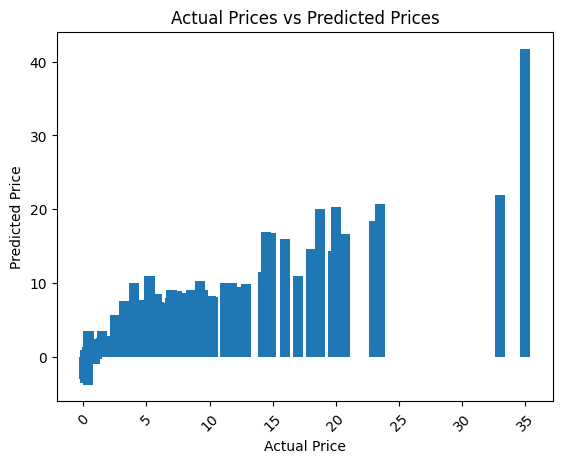

In [44]:
plt.bar(y_train, training_data_predicton)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.xticks(rotation=45)
plt.show()

In [45]:
## prediction on test data
test_data_prediction = lass_reg_model.predict(x_test)

In [47]:
Error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error :", Error_score)

R squared error : 0.8709167941173195


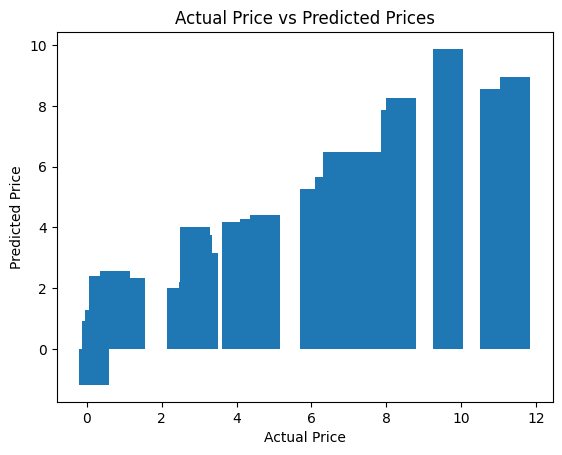

In [51]:
plt.bar(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

Task 4
## Provide a brief explanation of each algorithm and its suitability for the task.

Linear Regression: Linear Regression is a basic and widely-used algorithm for predicting continuous numeric value. It assumes a linear relationship between the independent varriable and the dependent variable. Linear Regression is suitable when the elationship between the features and the target can be adequately approximated by a linear model. It provides interpretability, as the coefficients indicate the impact of each feature on the target variable.

Logistic Regression: It is used for binary classification problems, where the target variable has two possible otcomes. It models the probability of the target belonging to a particular class based on the feature variables.
It assumes a linear realationship between the features and the log-odds of the target, which may not hold in some cases.

## Discuss any hyperparameter tuning or cross-validation techniques used for optimising the models.

Hyperparameter tuning and cross-validation are essential techniques for optimizing machine learning models. They help in finding the besr combination of hyperparameters and evaluating the model's performance for hyperparameter tuning and cross-validation.

Grid Search Cross-Validation: Grid search is brute-force techique that exhausively searches over a predeined grid of hyperpaarameter values to find the optimal combination. It involves specifying a set of possible values or each hyperparameter and creating all possible combinations. Cross-Validation is then performed on each combination t evaluate the model performance. The hyperparameter values that yield the best performance are selected as the optimal values. Grid Search is a straightforward to implementand ensures a comprehesive search, but it can be computationally expensice when dealing wuth a large number of hyperparameter or wide range of values.